In [1]:
import utils
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from netgraph import Graph
import numpy as np



In [2]:
USA_data = pd.read_csv('data/USA/H116_filtered_USA_votes.csv')
PA,PAV,PAVP,PP = utils.dict_create(USA_data,'icpsr','party_code','rollnumber','cast_code')

In [4]:
U_thres = np.average(utils.calc_thres(PP, PA, PAV))
USA_inter= utils.calc_inter_edges(PP,PA,PAV)
U_edgelist = utils.edgelist_calc(PA, PAV, U_thres)
U_edgelist = (U_edgelist + USA_inter)
G_USA = nx.from_edgelist(U_edgelist)
list_of_dangle = [node for node in G_USA.nodes if G_USA.degree(node) == 0]
list_of_dangle

[]

In [5]:
# Create node to community mapping based on party codes
node_to_community = {}
party_to_community = {
    100: 0,  # Democrat
    200: 1,  # Republican 
    328: 2,  # Independent
}

for icpsr in PAVP:
    party_code = PAVP[icpsr][0][2]  # Get party code from first vote
    node_to_community[icpsr] = party_to_community.get(party_code, 3)  # Default 3 for other parties

# Color mapping
community_to_color = {
    0: 'blue',      # Democrats
    1: 'red',       # Republicans
    2: 'green',     # Independents
    3: 'gray'       # Others
}
node_color = {node: community_to_color[community_id] 
              for node, community_id in node_to_community.items()}



/opt/anaconda3/lib/python3.11/site-packages/netgraph/_node_layout.py:1621: UserWarning: There are no connections within community 2. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections within community {community}. The placement of of nodes within this community is arbitrary.")
/opt/anaconda3/lib/python3.11/site-packages/netgraph/_node_layout.py:1024: RuntimeWarning: invalid value encountered in divide
  directions = deltas / magnitudes[:, np.newaxis]
/opt/anaconda3/lib/python3.11/site-packages/netgraph/_utils.py:360: RuntimeWarning: invalid value encountered in divide
  v = v / np.linalg.norm(v, axis=-1)[:, None] # unit vector


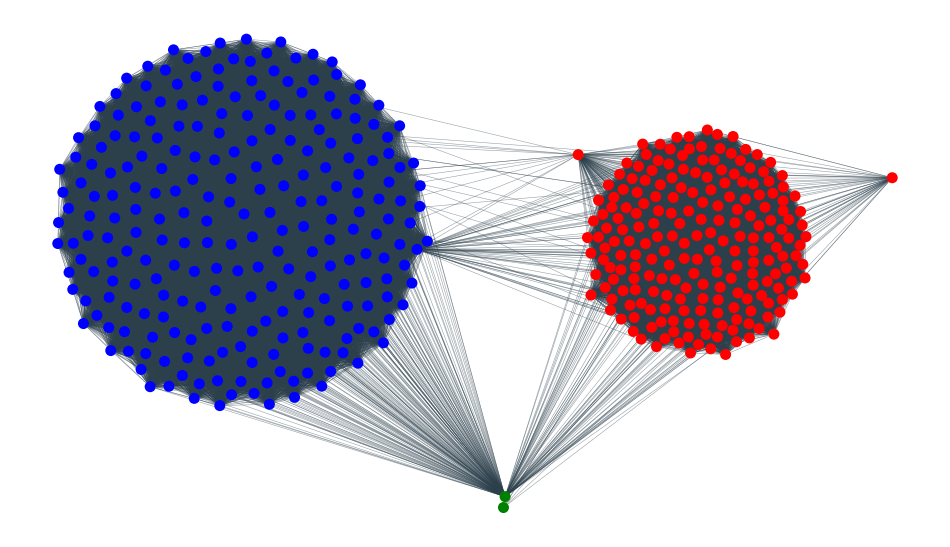

In [6]:
# Visualization
fig, ax = plt.subplots(figsize=(12, 8))
Graph(G_USA,
      node_color=node_color,
      node_edge_width=0,
      node_size=1,
      edge_width=0.1,
      edge_alpha=0.5,
      node_layout='community', 
      node_layout_kwargs=dict(node_to_community=node_to_community),
      ax=ax)
plt.show()